In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's perform a short EDA on our train and test datasets.

In [2]:
train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [3]:
print(train_set.shape)
train_set.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_set.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
837,838,0,3,"Sirota, Mr. Maurice",male,NaN,0,0,392092,8.0500,NaN,S
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
739,740,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [5]:
print(test_set.shape)
test_set.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_set.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
321,1213,3,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,7.2292,F E57,C
238,1130,2,"Hiltunen, Miss. Marta",female,18.0,1,1,250650,13.0000,NaN,S
157,1049,3,"Lundin, Miss. Olga Elida",female,23.0,0,0,347469,7.8542,NaN,S
257,1149,3,"Niklasson, Mr. Samuel",male,28.0,0,0,363611,8.0500,NaN,S
31,923,2,"Jefferys, Mr. Clifford Thomas",male,24.0,2,0,C.A. 31029,31.5000,NaN,S


Test and train data sets seem consistent: random instances are similar to the instances from the begining of the sets. Also, we see one column (Survived) is absent in test data set - it is target variable for classification. Let's look at duplicate values.

In [7]:
train_set[train_set.drop('PassengerId', axis='columns').duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [8]:
test_set[test_set.drop('PassengerId', axis='columns').duplicated()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


As we see, therer are none. Let's look at missing values.

In [9]:
print(train_set.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
print(test_set.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


We can see that "Cabin" feature contains mostly missing values, so we should remove corresponding column. Besides that, "Ticket" feature contains many unique values hard for interpetation. Also, we should remove ID and Name columns, because they don`t have any value for clusterization, and separate target feature from train set.

In [11]:
target = train_set['Survived'].astype('bool')
train_set.drop('Survived', axis='columns', inplace=True)

cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

train_set.drop(columns=cols_to_drop, inplace=True)
test_set.drop(columns=cols_to_drop, inplace=True)

print('train set', train_set.shape)
print('test set', test_set.shape)

train set (891, 7)
test set (418, 7)


Before we deal with other missing values, let's view which types of features our datasets currently have.

In [12]:
for col in train_set:
    print(col, train_set[col].dtypes)

Pclass int64
Sex object
Age float64
SibSp int64
Parch int64
Fare float64
Embarked object


"Pclass" can be considered as categorical, but it is ordinal and already encoded, so we will left it int64. "Sex" and "Embarked" are categorical and nominal, so we will mark them as category-type and then one-hot encode later. All other features already have correct types.

In [13]:
train_set['Sex'] = train_set['Sex'].astype('category')
test_set['Sex'] = test_set['Sex'].astype('category')

In [14]:
train_set['Embarked'] = train_set['Embarked'].astype('category')
test_set['Embarked'] = test_set['Embarked'].astype('category')

In [15]:
for col in train_set:
    print(col, train_set[col].dtypes)

Pclass int64
Sex category
Age float64
SibSp int64
Parch int64
Fare float64
Embarked category


Now we can replace missing values in train set in "Embarked" feature with 'XNA'. Numerical missing values will be replaced by respective columns means, when we will remove outliers.

In [16]:
train_set['Embarked'] = train_set['Embarked'].cat.add_categories('XNA')
train_set[col] = train_set[col].fillna('XNA')

In [17]:
categorical_features = ['Sex', 'Embarked']
numerical_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Now we can check if there are categorical-type features from test data set, which have categories absent in train set.

In [18]:
for col in categorical_features:
    unique_train = pd.unique(train_set[col])
    unique_test = pd.unique(test_set[col])
    for obj in unique_test:
        if not obj in unique_train:
            print(col, '|', unique_train, '|', unique_test, '|', obj)

As we see, there are none. Now we can proceed with finding outliers and fixing missing numerical values.

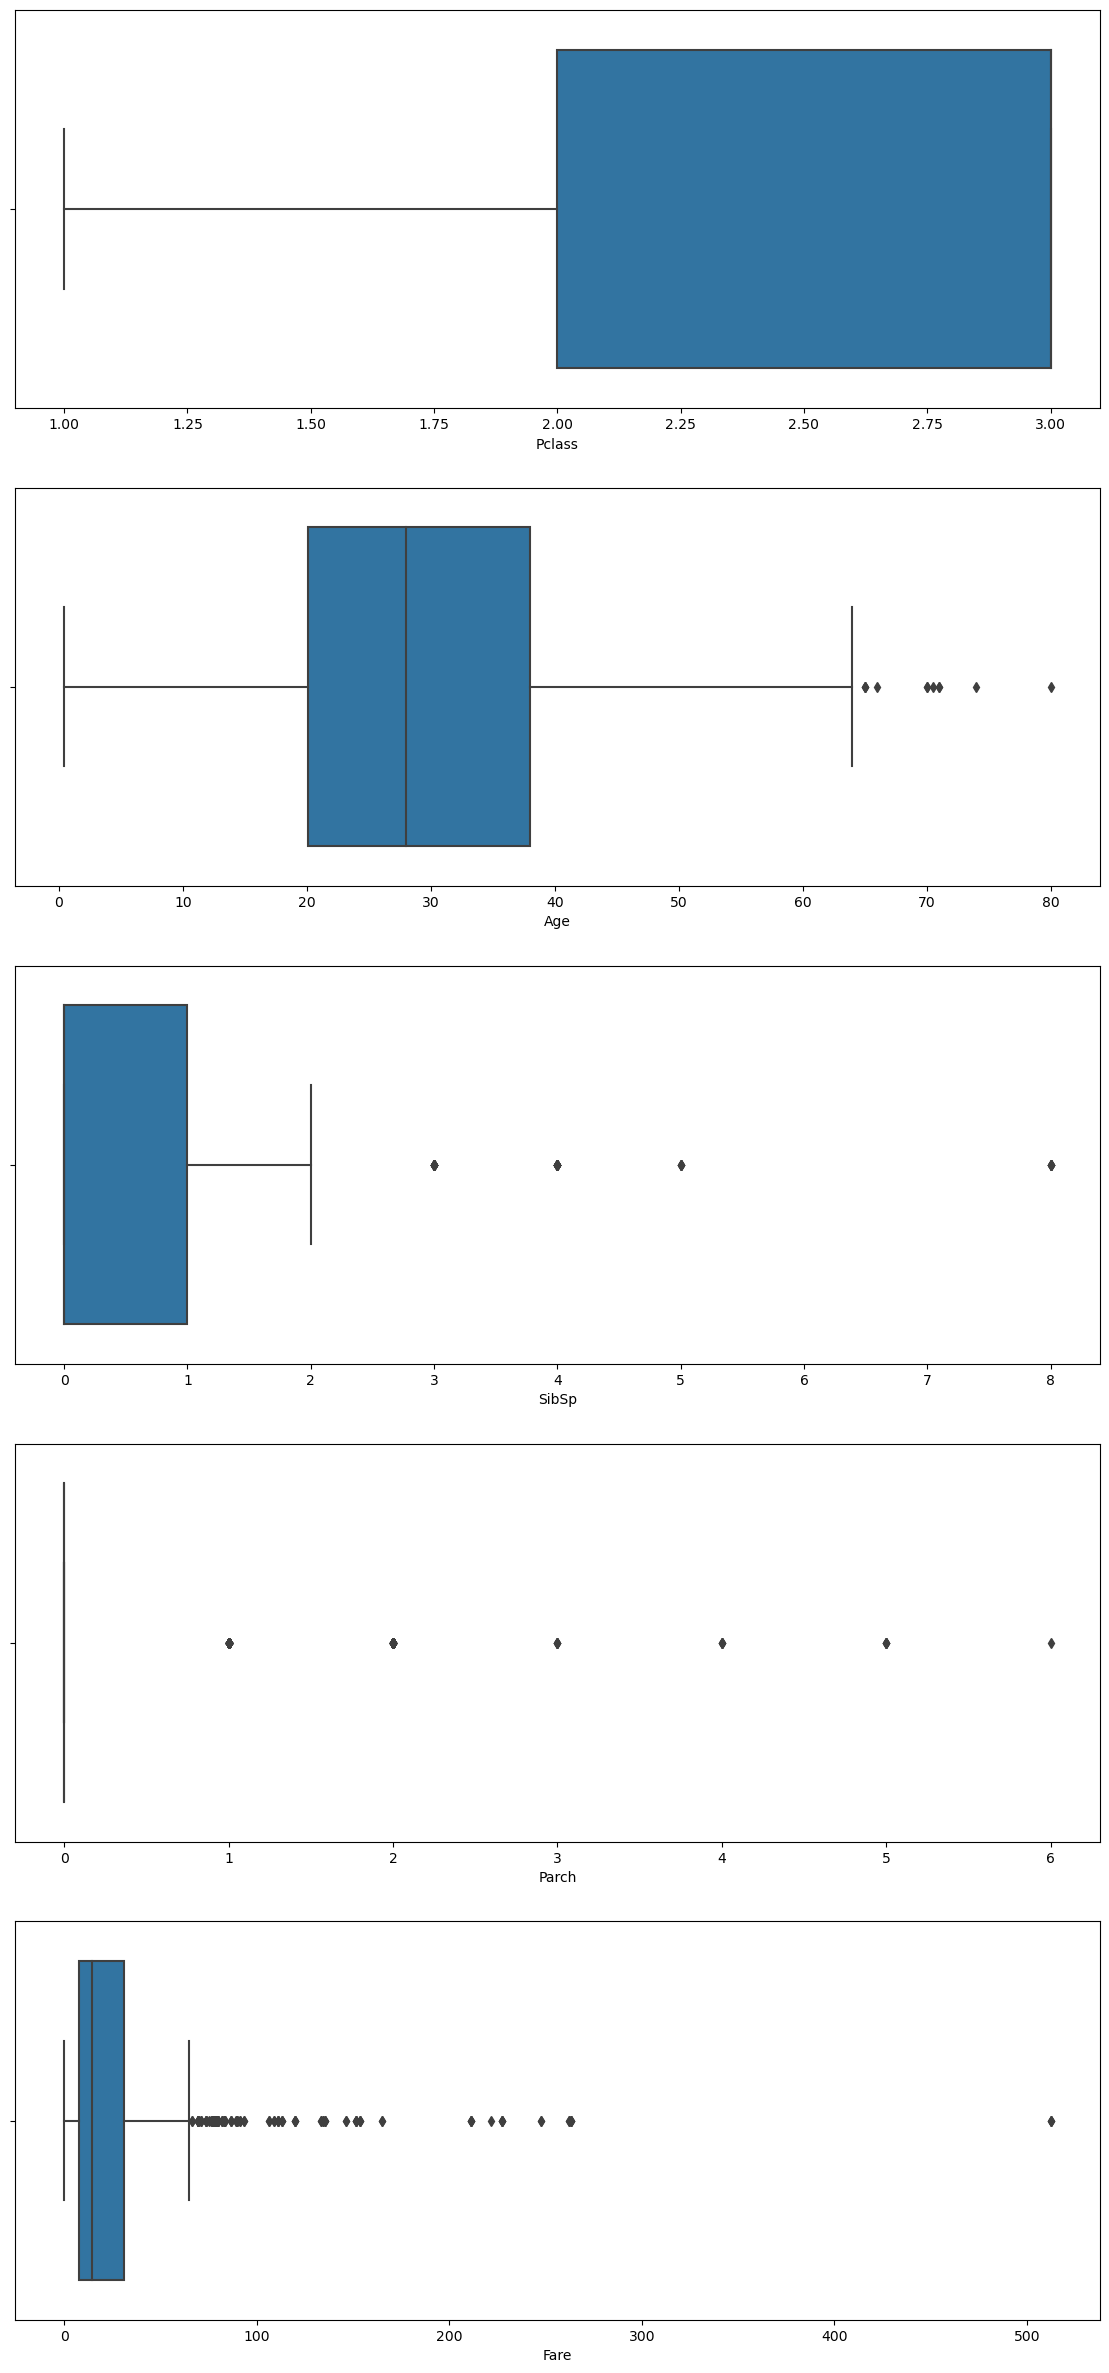

In [19]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(14, 30)

for i, col in enumerate(numerical_features):
    sns.boxplot(x=train_set[col], ax=axes[i])

plt.show()

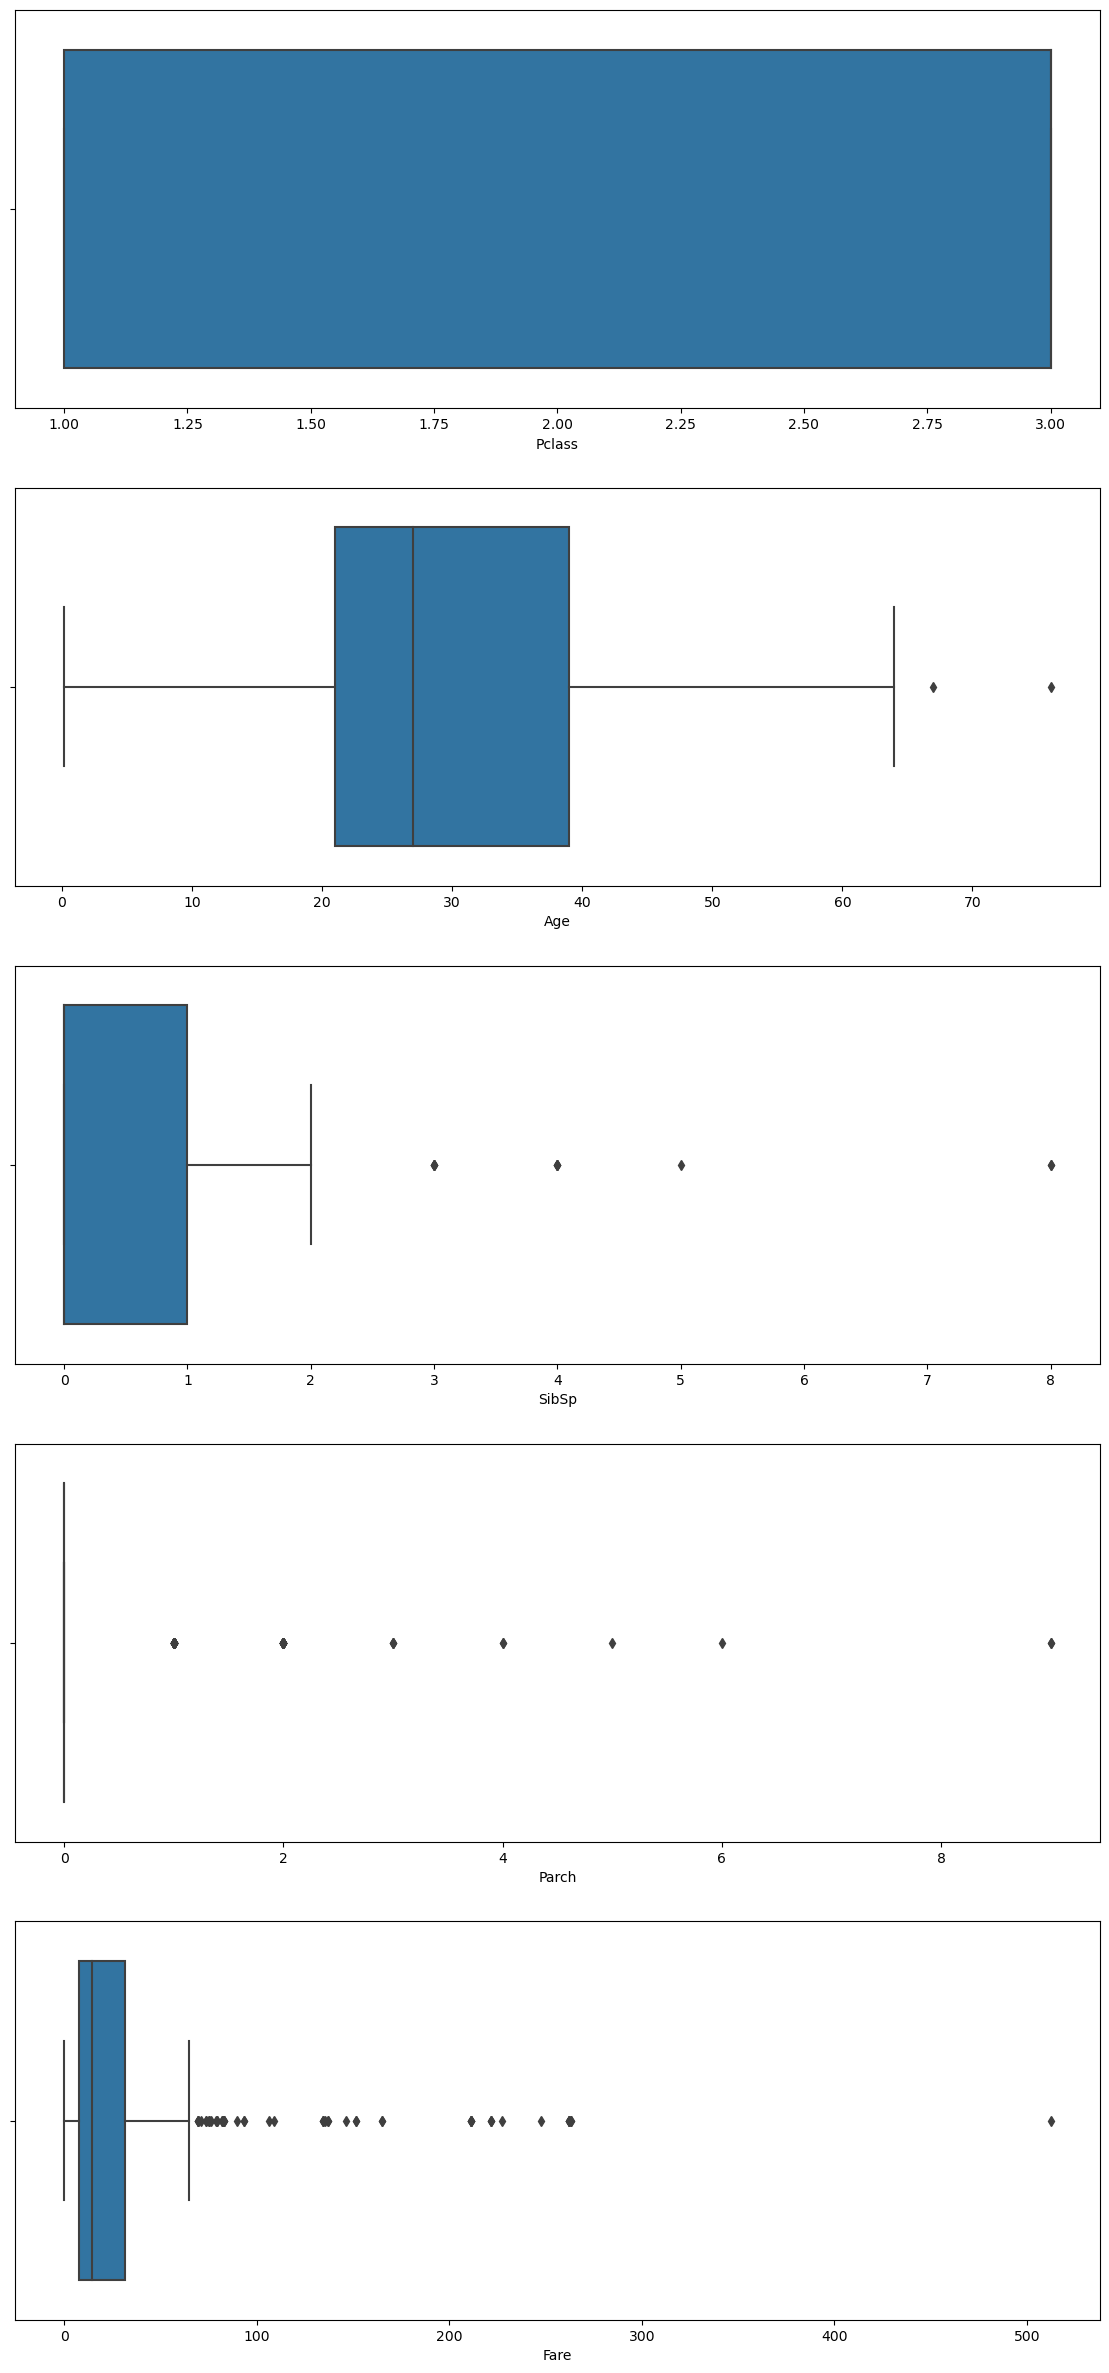

In [20]:
fig, axes = plt.subplots(nrows=len(numerical_features), ncols=1)
fig.set_size_inches(14, 30)

for i, col in enumerate(numerical_features):
    sns.boxplot(x=test_set[col], ax=axes[i])

plt.show()

Looking at this box plots, we can see that only "Fare" contains not very significant outliers in train and test sets. Let's look at instances with this value.

In [21]:
train_set[train_set['Fare'] > 400]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
258,1,female,35.0,0,0,512.3292,C
679,1,male,36.0,0,1,512.3292,C
737,1,male,35.0,0,0,512.3292,C


In [22]:
test_set[test_set['Fare'] > 400]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
343,1,female,58.0,0,1,512.3292,C


All instances are 1st class tickets for passengers aged more then 35 from Cherbourg, so this instances look more like actual data then errors. Now, we can replace all nan in numerical features with some values. In this case, all nans can simply be means of corresponding features.

In [23]:
for col in numerical_features:
    mean = np.mean(train_set[col])
    np.nan_to_num(train_set[col], copy=False, nan=mean)
    np.nan_to_num(test_set[col], copy=False, nan=mean)

Now, when we processed our data sets, we can one-hot encode categorical features and start clusterization.

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

Firstly, let's perform k-means clusterization for 2 clusters. KMeans model is able to predict clusters for new data, so we will keep test and train set separate for now.

In [25]:
data_transformer = ColumnTransformer(transformers=[
    ("categorical_features", OneHotEncoder(), categorical_features),
    ("numerical_features", StandardScaler(), numerical_features)
])

transformed_train_set = pd.DataFrame(data_transformer.fit_transform(train_set))
transformed_test_set = pd.DataFrame(data_transformer.transform(test_set))

In [26]:
kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(transformed_train_set)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=2, n_init='auto')

Now we want to visualize our clusters using dimensionality reduction (PCA). Besides highlighting different clusters we will also use different marks for inctances from train set according to target feature.

In [27]:
pca = PCA(n_components=2)
pca.fit(transformed_train_set)

PCA(n_components=2)

<Axes: xlabel='PC1', ylabel='PC2'>

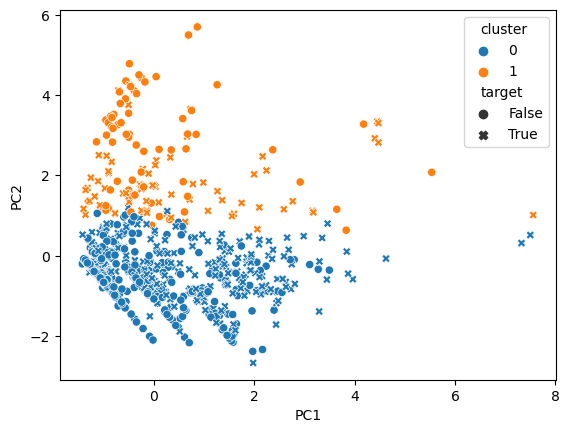

In [28]:
pca_train = pd.DataFrame(pca.transform(transformed_train_set), columns=['PC1', 'PC2'])

pca_train['cluster'] = pd.Categorical(kmeans.labels_)
pca_train['target'] = pd.Categorical(target)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', style='target', data=pca_train)

<Axes: xlabel='PC1', ylabel='PC2'>

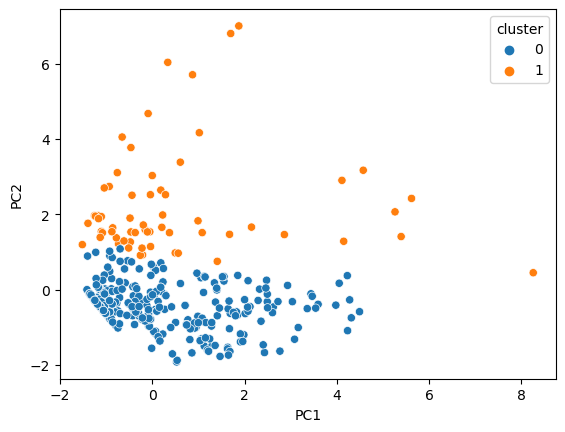

In [29]:
pca_test = pd.DataFrame(pca.transform(transformed_test_set), columns=['PC1', 'PC2'])

pca_test['cluster'] = pd.Categorical(kmeans.predict(transformed_test_set))

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_test)


Looking at this visualisations, we can see same distribution patterns for train and test set, and observe some patterns in survivability rate among passengers. Let's perform k-means clusterization for more clusters.

In [30]:
kmeans = KMeans(n_clusters=4, n_init='auto')
kmeans.fit(transformed_train_set)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto')

<Axes: xlabel='PC1', ylabel='PC2'>

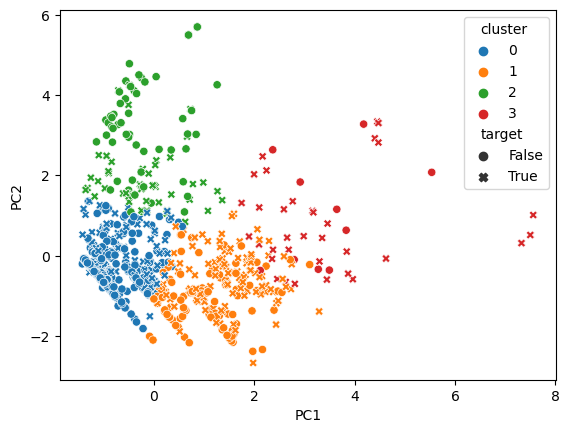

In [31]:
pca_train = pd.DataFrame(pca.transform(transformed_train_set), columns=['PC1', 'PC2'])

pca_train['cluster'] = pd.Categorical(kmeans.labels_)
pca_train['target'] = pd.Categorical(target)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', style='target', data=pca_train)

<Axes: xlabel='PC1', ylabel='PC2'>

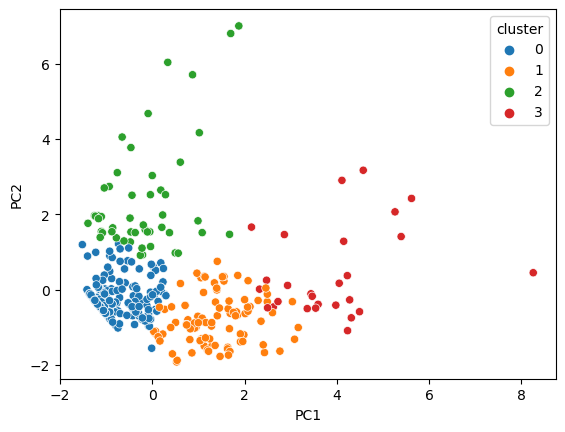

In [32]:
pca_test = pd.DataFrame(pca.transform(transformed_test_set), columns=['PC1', 'PC2'])

pca_test['cluster'] = pd.Categorical(kmeans.predict(transformed_test_set))

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_test)

As we can see, our data can be separated in 4 distinct clusters, and each will show some survival rate patterns. Lets now look, how different clustering methods (Agglomerative, DBSCAN) will deal with this datasets. Those methods can't perform prediction, so we will merge train and test sets. Because of this, we will also not be able to use target feature in visualisation.

In [33]:
data_set = pd.concat([train_set, test_set])

data_transformer = ColumnTransformer(transformers=[
    ("categorical_features", OneHotEncoder(), categorical_features),
    ("numerical_features", StandardScaler(), numerical_features)
])

transformed_data_set = pd.DataFrame(data_transformer.fit_transform(data_set))

In [34]:
aggl = AgglomerativeClustering(n_clusters=4, compute_full_tree=False, linkage='single')
aggl.fit(transformed_data_set)

AgglomerativeClustering(compute_full_tree=False, linkage='single', n_clusters=4)

In [35]:
pca = PCA(n_components=2)
pca.fit(transformed_data_set)

PCA(n_components=2)

<Axes: xlabel='PC1', ylabel='PC2'>

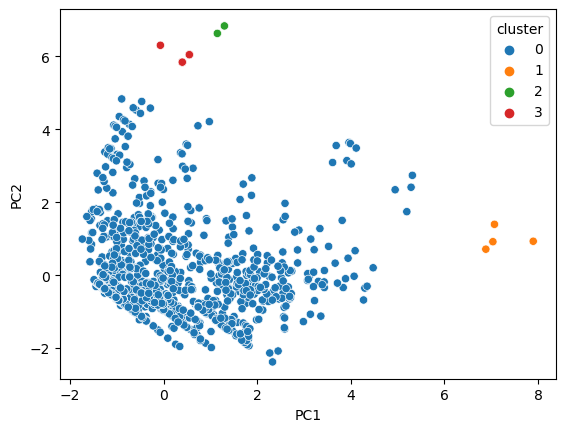

In [36]:
pca_data = pd.DataFrame(pca.transform(transformed_data_set), columns=['PC1', 'PC2'])

pca_data['cluster'] = pd.Categorical(aggl.labels_)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_data)

In [37]:
aggl = AgglomerativeClustering(n_clusters=4, compute_full_tree=False, linkage='ward')
aggl.fit(transformed_data_set)

AgglomerativeClustering(compute_full_tree=False, n_clusters=4)

<Axes: xlabel='PC1', ylabel='PC2'>

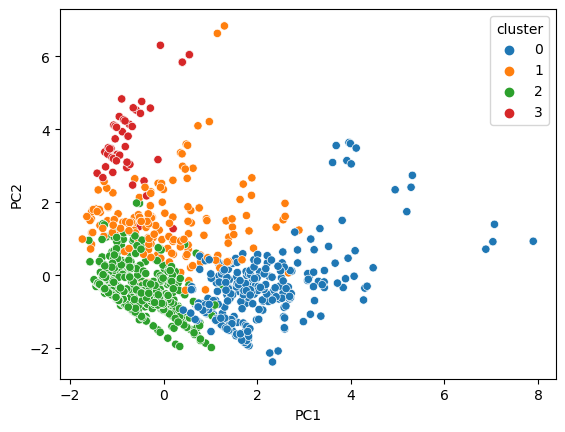

In [38]:
pca_data = pd.DataFrame(pca.transform(transformed_data_set), columns=['PC1', 'PC2'])

pca_data['cluster'] = pd.Categorical(aggl.labels_)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_data)

We can see that in our case agglomerative clustering performs much better with ward linkage criterion, because when we use single linkage, outliers tend to fall in separate clusters, resulting in one very big main cluster, which hardly tells us something about data. Lets also build hierarchical dendrogram.

In [39]:
from scipy.cluster.hierarchy import dendrogram

In [40]:
# code from scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1 # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [41]:
aggl = AgglomerativeClustering(n_clusters=None, compute_full_tree=True, linkage='ward', distance_threshold=0)
aggl.fit(transformed_data_set)

AgglomerativeClustering(compute_full_tree=True, distance_threshold=0,
                        n_clusters=None)

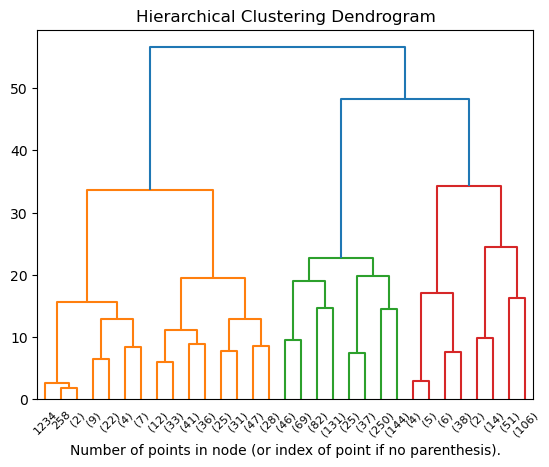

In [42]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(aggl, truncate_mode='level', p = 4)
plt.xlabel('Number of points in node (or index of point if no parenthesis).')
plt.show()

Finaly, lets look how DBSCAN performs with different epsilon (maximum distance between two samples for one to be considered as in the neighborhood of the other).

In [57]:
dbscan = DBSCAN(eps = 2, min_samples=2)
dbscan.fit(transformed_data_set)

DBSCAN(eps=2, min_samples=2)

<Axes: xlabel='PC1', ylabel='PC2'>

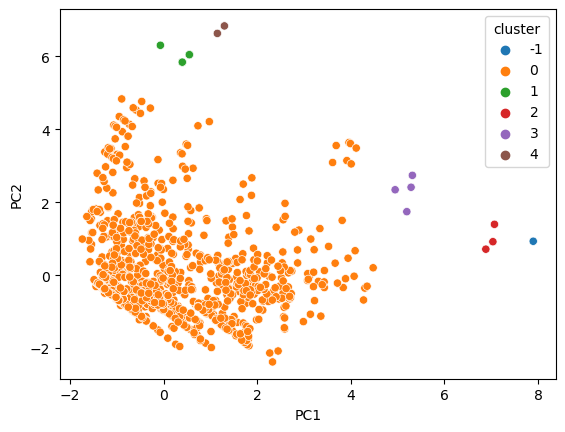

In [58]:
pca_data = pd.DataFrame(pca.transform(transformed_data_set), columns=['PC1', 'PC2'])

pca_data['cluster'] = pd.Categorical(dbscan.labels_)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_data)

In [59]:
dbscan = DBSCAN(eps = 1.5, min_samples=2)
dbscan.fit(transformed_data_set)

DBSCAN(eps=1.5, min_samples=2)

<Axes: xlabel='PC1', ylabel='PC2'>

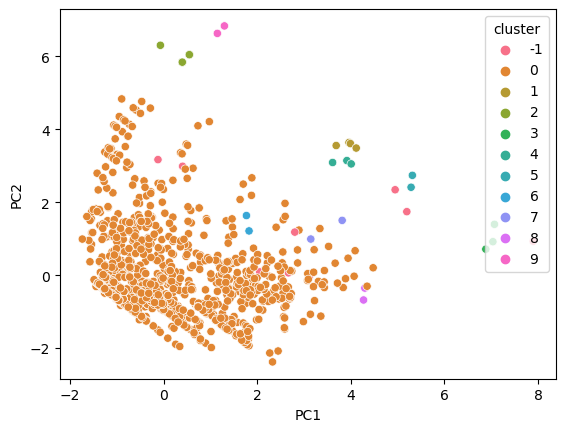

In [60]:
pca_data = pd.DataFrame(pca.transform(transformed_data_set), columns=['PC1', 'PC2'])

pca_data['cluster'] = pd.Categorical(dbscan.labels_)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_data)

In [61]:
dbscan = DBSCAN(eps = 1.3, min_samples=2)
dbscan.fit(transformed_data_set)

DBSCAN(eps=1.3, min_samples=2)

<Axes: xlabel='PC1', ylabel='PC2'>

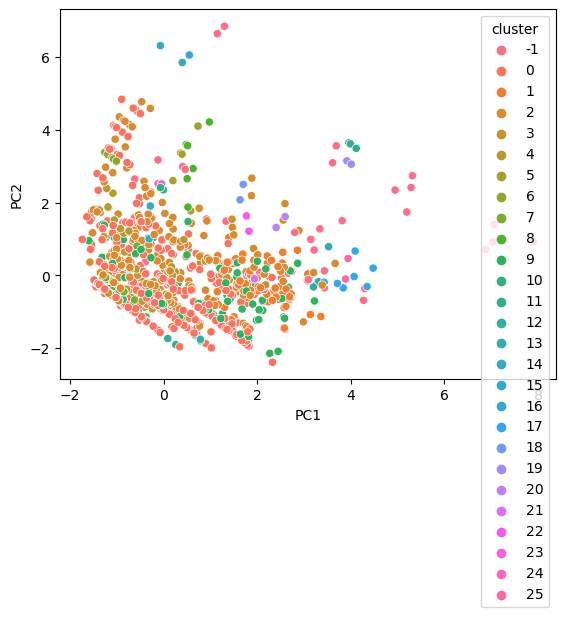

In [62]:
pca_data = pd.DataFrame(pca.transform(transformed_data_set), columns=['PC1', 'PC2'])

pca_data['cluster'] = pd.Categorical(dbscan.labels_)

sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_data)

As we can see, DBSCAN performs bad on our dataset, tending to find one big cluster (same as agglomerative clustering with single linkage criterion) or to many small clusters.

In general, clusterization have shown us that our dataset consists of data, many instances of wich can be found similar, with a few outliers. However, instances can still be divided into clusters, where instances are more resembling (e.g. survival rate).